# Distribution Plots

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
%matplotlib inline

In [6]:
# Seaborn has built in datasets
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### distplot()

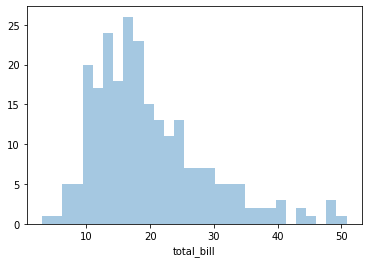

In [10]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

### jointplot()

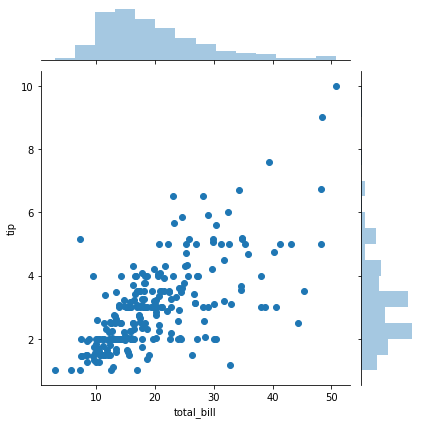

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips)

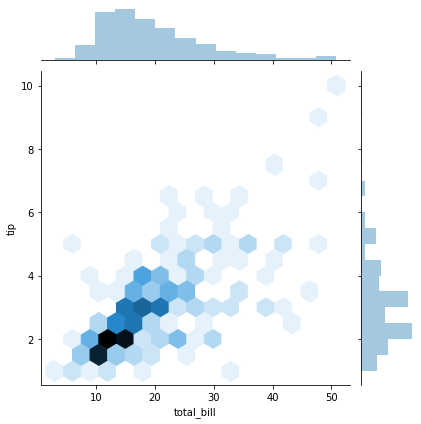

In [20]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

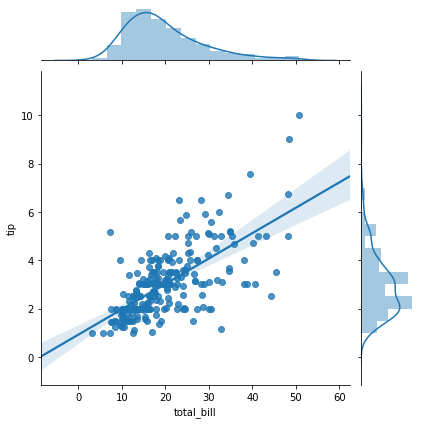

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### pairplot()

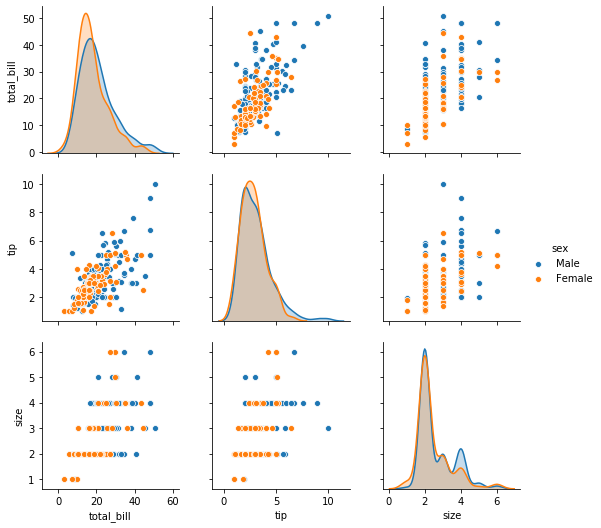

In [22]:
# Does jointplot for every single combination of numerical columns in tips dataframe
# hue and palette arguments to change colours
sns.pairplot(tips, hue='sex')

### rugplot()

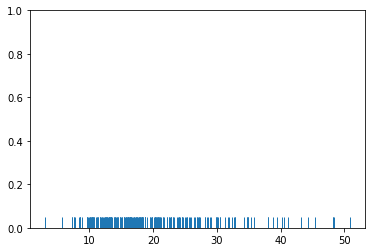

In [24]:
# Draw dash mark for every point on distribution
sns.rugplot(tips['total_bill'])

### kdeplot()

(0, 1)

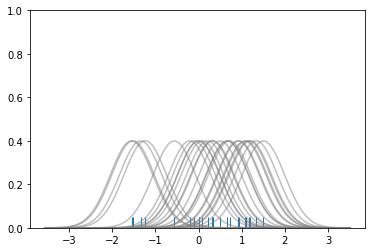

In [29]:
dataset = np.random.randn(25)
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

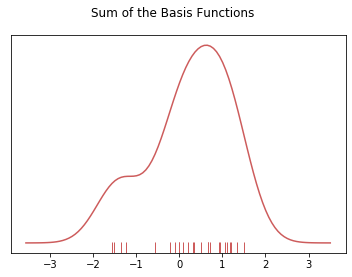

In [31]:
# Sum basic functions to get the kdeplot

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

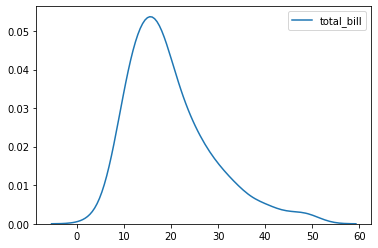

In [32]:
sns.kdeplot(tips['total_bill'])